In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf
import os

from os import listdir


import uproot3
#import uproot


rc('text', usetex=True)

import matplotlib as mpl

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.font_manager import FontProperties

from numpy import inf

import os

rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
#rc('font', size=22)
#rc('xtick', labelsize=15)
#rc('ytick', labelsize=15)
rc('legend', fontsize=15)
rc('xtick', labelsize=10)
rc('ytick', labelsize=10)
rc('font', size=10)


#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

import matplotlib.pyplot as plt
import mplhep as hep
#hep.set_style(hep.style.CMS)
#hep.set_style("CMS")
hep.style.use("CMS")



/Users/owen/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
save_plots = True


#infile_name_fullsim = 'h1-fullsim-2021-07-19/Django_Eplus0607_1.nominal.root'
infile_name_fullsim = 'h1-fullsim-2021-07-19/h1fullsim-5files.root'

#infile_name_fastsim = 'mini-tree-trkres4-ecalres3-no-turnoff.root'
#infile_name_fastsim = 'mini-tree-10percent-constant-calo-only.root'
#infile_name_fastsim = 'mini-tree-gen-HFS-etamax2.5.root'
#infile_name_fastsim = 'mini-tree-gen-HFS-etamax3.0.root'
#infile_name_fastsim = 'mini-tree-gen-HFS-etamax4.0.root'
#infile_name_fastsim = 'mini-tree-gen-HFS-etamax5.0.root'
#infile_name_fastsim = 'mini-tree-gen-HFS-etamax6.0.root'
#infile_name_fastsim = 'mini-tree-gen-HFS-etamax7.0.root'

#infile_name_fastsim = 'mini-tree-badres-etagt2.5-only.root'

#infile_name_fastsim = 'mini-tree-nim-hcal-coverage-towers-only.root'
#infile_name_fastsim = 'mini-tree-nim-hcal-coverage-eflow.root'
#infile_name_fastsim = 'mini-tree-nim-hcal2-towers-only.root'
#infile_name_fastsim = 'mini-tree-nim-hcal2-towers-only-double-turnoff.root'
#infile_name_fastsim = 'mini-tree-nim-hcal2-towers-only-badres-at-edges.root'
#infile_name_fastsim = 'mini-tree-nim-hcal2-towers-only-badres-at-edges-hcal-20percent-const.root'
#infile_name_fastsim = 'mini-tree.root'
#infile_name_fastsim = 'mini-tree-noise-lm-0.0-ls-0.1-p1.0-etamin0.76-edge-reso-good.root'
infile_name_fastsim = 'mini-tree-noise-lm-0.0-ls-0.1-p1.0.root'


ur_file_fullsim = uproot3.open(infile_name_fullsim)

ur_file_fastsim = uproot3.open(infile_name_fastsim)

#ur_file_fullsim = uproot.concatenate('h1-fullsim-2021-07-19/Django_Eplus0607_*.nominal.root:Django/minitree')

print (ur_file_fullsim.keys())
print (ur_file_fullsim['Django'].keys())
ur_tree_fullsim = ur_file_fullsim['Django']['minitree']
print(ur_tree_fullsim)
mc_fullsim = ur_tree_fullsim.pandas.df(['*'], entrystop=3e7,flatten=True)

print (ur_file_fastsim.keys()) 
ur_tree_fastsim = ur_file_fastsim['minitree']
print(ur_tree_fastsim)
mc_fastsim   =  ur_tree_fastsim.pandas.df(['*'], entrystop=3e7,flatten=True)



#-- fix gen_x in fullsim
mc_fullsim.eval('s = 4*27.6*920', inplace=True)
mc_fullsim.eval('gen_x = gen_Q2/(s*gen_y)', inplace=True)

mc_fullsim = mc_fullsim.query('gen_Q2>200')
mc_fullsim = mc_fullsim.query('Q2_e>0')

mc_fullsim.eval('s = 4*27.6*920', inplace=True)
mc_fullsim.eval('x_e = Q2_e/(s*y_e)',inplace=True)
mc_fullsim.eval('x_da = Q2_da/(s*y_da)',inplace=True)
mc_fullsim.eval('x_sigma = Q2_sigma/(s*y_sigma)',inplace=True)
mc_fullsim.eval('x_esigma = x_sigma',inplace=True)
mc_fullsim.eval('x_h = Q2_h/(s*y_h)',inplace=True)

mc_fullsim.eval('xe_ratio = x_e/gen_x',inplace=True)
mc_fullsim.eval('xda_ratio = x_da/gen_x',inplace=True)
mc_fullsim.eval('xsigma_ratio = x_sigma/gen_x',inplace=True)
mc_fullsim.eval('xesigma_ratio = x_esigma/gen_x',inplace=True)
mc_fullsim.eval('xh_ratio = x_h/gen_x',inplace=True)


mc_fastsim.eval('xe_ratio = x_e/gen_x',inplace=True)
mc_fastsim.eval('xda_ratio = x_da/gen_x',inplace=True)
mc_fastsim.eval('xsigma_ratio = x_sigma/gen_x',inplace=True)
mc_fastsim.eval('xh_ratio = x_h/gen_x',inplace=True)


#-- remove tail of strange events in fastsim
mc_fastsim = mc_fastsim.query( 'HFS_pt > 2')


[b'Django;1']
[b'minitree;1', b'DISEvent;1']
<TTree b'minitree' at 0x000139b31f40>
[b'minitree;1']
<TTree b'minitree' at 0x00010d2413a0>


['gen_y>0.5 and gen_y<0.7' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']
gen_y>0.5 and gen_y<0.7
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05


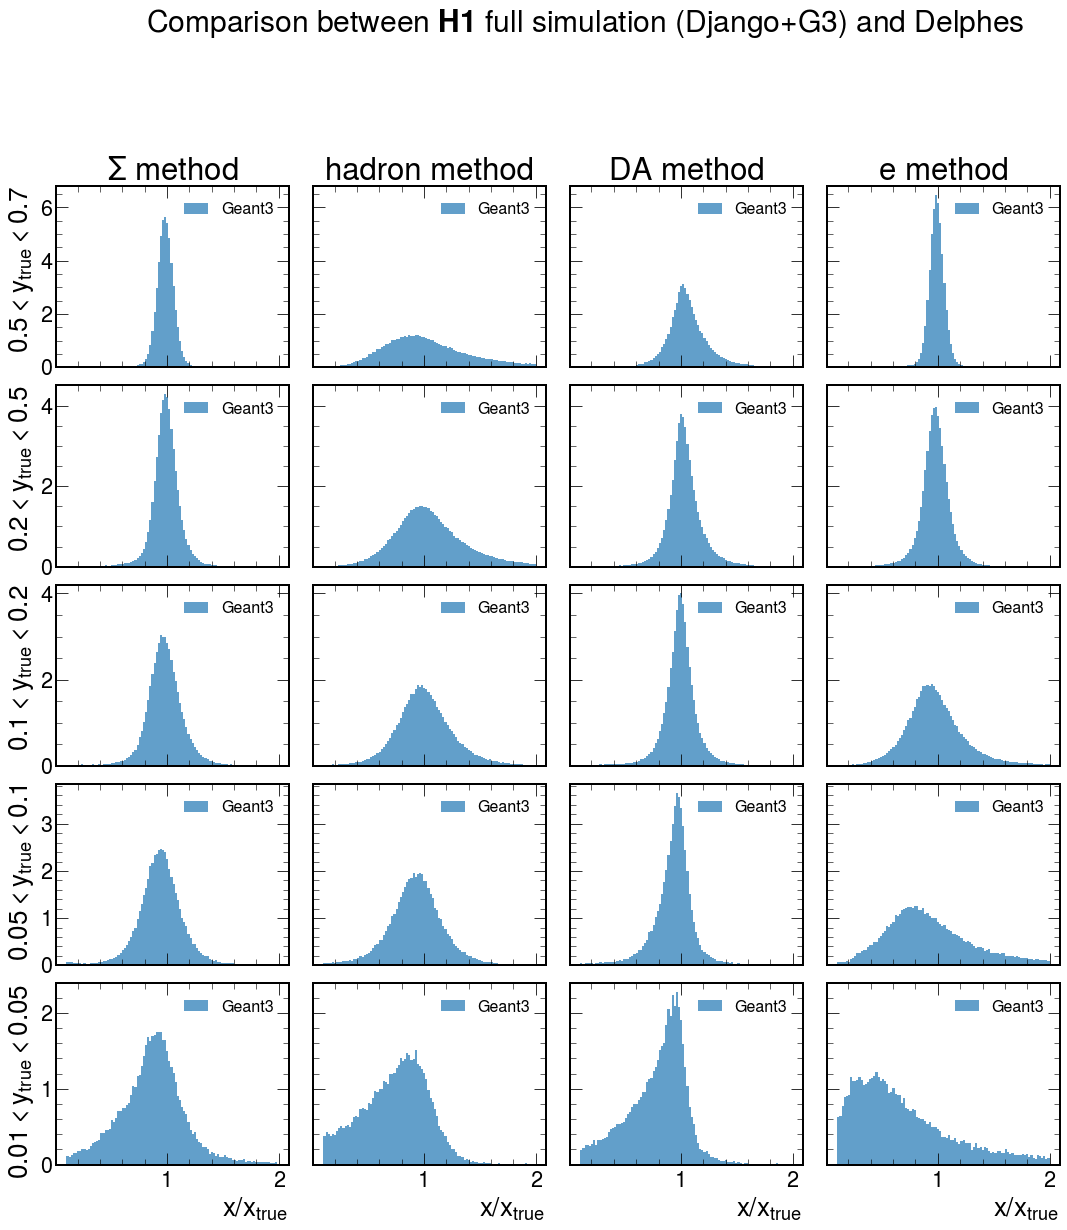

In [3]:
fig,ax = plt.subplots(5,4,figsize=(18,18),sharey='row',sharex=True)
ax = ax.flatten()
ybins = np.array(['gen_y>0.5 and gen_y<0.7', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)

myalpha=0.7
for i in range(5):
    print(ybins[i])
    temp = mc_fullsim.query(ybins[i])
    ax[3 + 4*i].hist(temp['xe_ratio'],weights=temp['wgt'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')
    ax[2 + 4*i].hist(temp['xda_ratio'],weights=temp['wgt'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')
    ax[1 + 4*i].hist(temp['xh_ratio'],weights=temp['wgt'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')
    ax[0 + 4*i].hist(temp['xsigma_ratio'],weights=temp['wgt'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')

plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].set_title('$\Sigma$ method')
ax[1].set_title('hadron method')
ax[2].set_title('DA method')
ax[3].set_title('e method')




ax[0].set_ylabel(' $0.5<y_{true}<0.7$')
ax[4].set_ylabel(' $0.2<y_{true}<0.5$')
ax[8].set_ylabel(' $0.1<y_{true}<0.2$')
ax[12].set_ylabel(' $0.05<y_{true}<0.1$')
ax[16].set_ylabel(' $0.01<y_{true}<0.05$')
ax[-1].set_xlabel(r'$x/x_{true}$ ')

ax[-2].set_xlabel(r'$x/x_{true}$ ')
ax[-3].set_xlabel(r'$x/x_{true}$ ')
ax[-4].set_xlabel(r'$x/x_{true}$ ')

for i in range(len(ax.flatten())):
    ax[i].legend(loc='best',fontsize=16)    
plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].text(4.75, 12.9,r"Comparison between $\bf{H1}$"+' full simulation (Django+G3) and Delphes ',
                 horizontalalignment='center',multialignment='center',
verticalalignment='center', fontsize=30)
plt.show()

['gen_y>0.5 and gen_y<0.7' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']
gen_y>0.5 and gen_y<0.7
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05


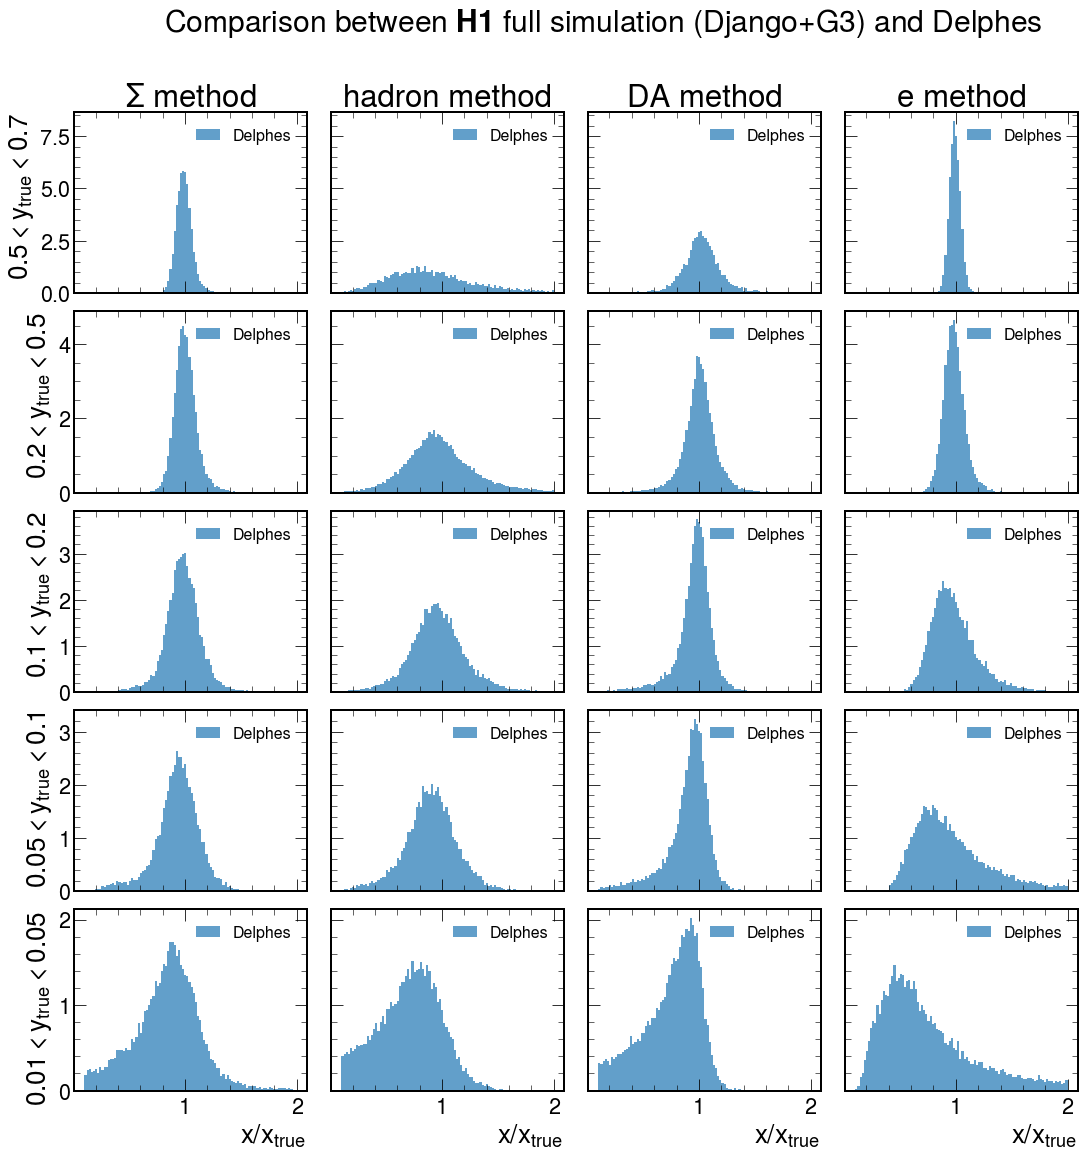

In [4]:
fig,ax = plt.subplots(5,4,figsize=(18,18),sharey='row',sharex=True)
ax = ax.flatten()
ybins = np.array(['gen_y>0.5 and gen_y<0.7', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)

myalpha=0.7
for i in range(5):
    print(ybins[i])
    temp = mc_fastsim.query(ybins[i])
    ax[3 + 4*i].hist(temp['xe_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes')
    ax[2 + 4*i].hist(temp['xda_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes')
    ax[1 + 4*i].hist(temp['xh_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes')
    ax[0 + 4*i].hist(temp['xsigma_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes')

plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].set_title('$\Sigma$ method')
ax[1].set_title('hadron method')
ax[2].set_title('DA method')
ax[3].set_title('e method')




ax[0].set_ylabel(' $0.5<y_{true}<0.7$')
ax[4].set_ylabel(' $0.2<y_{true}<0.5$')
ax[8].set_ylabel(' $0.1<y_{true}<0.2$')
ax[12].set_ylabel(' $0.05<y_{true}<0.1$')
ax[16].set_ylabel(' $0.01<y_{true}<0.05$')
ax[-1].set_xlabel(r'$x/x_{true}$ ')

ax[-2].set_xlabel(r'$x/x_{true}$ ')
ax[-3].set_xlabel(r'$x/x_{true}$ ')
ax[-4].set_xlabel(r'$x/x_{true}$ ')

for i in range(len(ax.flatten())):
    ax[i].legend(loc='best',fontsize=16)    
plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].text(4.75, 12.9,r"Comparison between $\bf{H1}$"+' full simulation (Django+G3) and Delphes ',
                 horizontalalignment='center',multialignment='center',
verticalalignment='center', fontsize=30)
plt.show()

['gen_y>0.5 and gen_y<0.7' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']
gen_y>0.5 and gen_y<0.7
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05
gen_y>0.5 and gen_y<0.7
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05


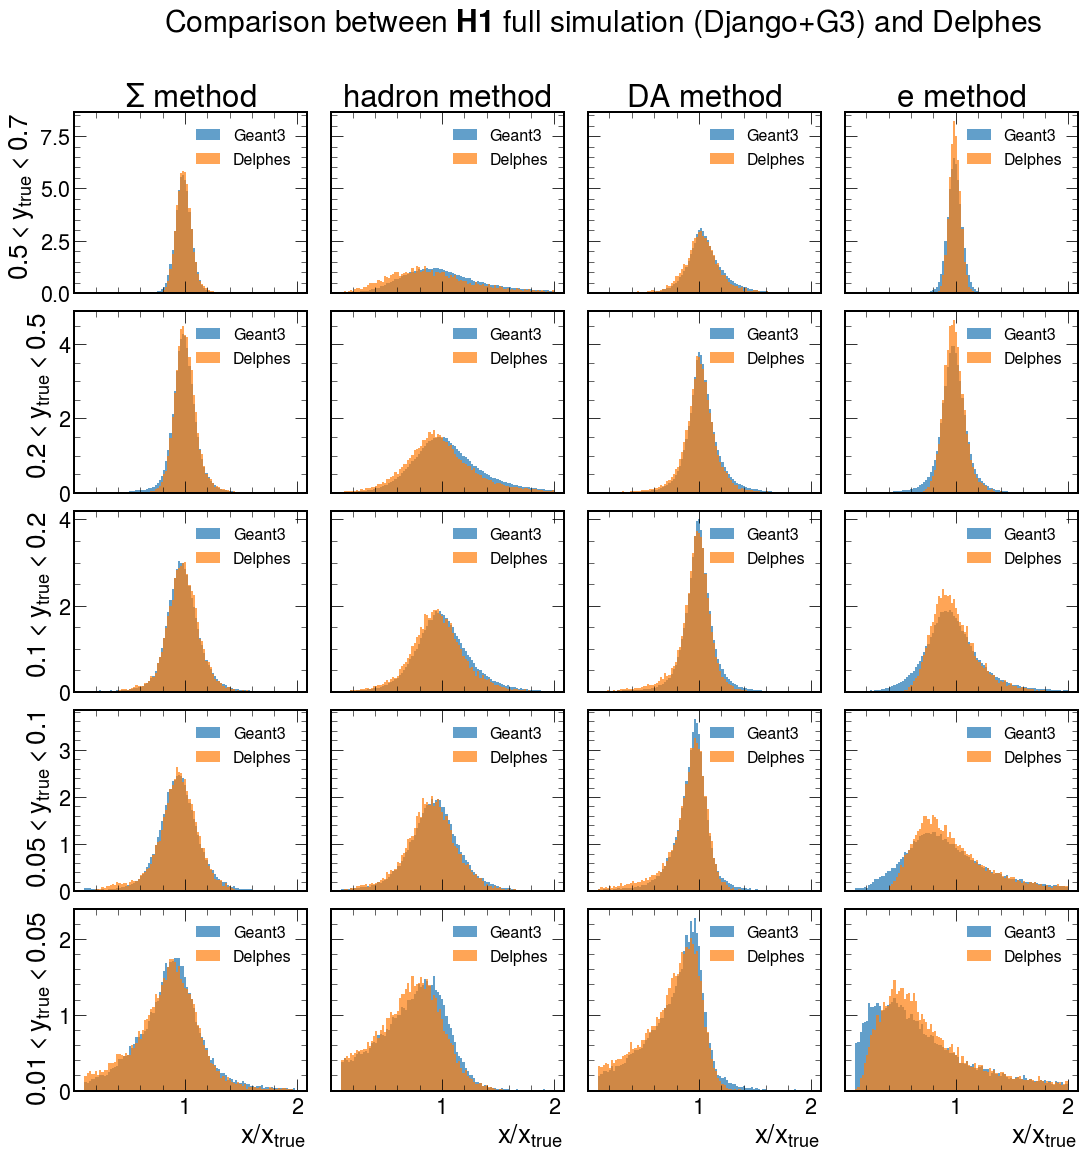

In [5]:
fig,ax = plt.subplots(5,4,figsize=(18,18),sharey='row',sharex=True)
ax = ax.flatten()
ybins = np.array(['gen_y>0.5 and gen_y<0.7', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)

myalpha=0.7

for i in range(5):
    print(ybins[i])
    temp = mc_fullsim.query(ybins[i])
    ax[3 + 4*i].hist(temp['xe_ratio'],weights=temp['wgt'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')
    ax[2 + 4*i].hist(temp['xda_ratio'],weights=temp['wgt'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')
    ax[1 + 4*i].hist(temp['xh_ratio'],weights=temp['wgt'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')
    ax[0 + 4*i].hist(temp['xsigma_ratio'],weights=temp['wgt'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')



for i in range(5):
    print(ybins[i])
    temp = mc_fastsim.query(ybins[i])
    ax[3 + 4*i].hist(temp['xe_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes')
    ax[2 + 4*i].hist(temp['xda_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes')
    ax[1 + 4*i].hist(temp['xh_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes')
    ax[0 + 4*i].hist(temp['xsigma_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes')


    
plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].set_title('$\Sigma$ method')
ax[1].set_title('hadron method')
ax[2].set_title('DA method')
ax[3].set_title('e method')




ax[0].set_ylabel(' $0.5<y_{true}<0.7$')
ax[4].set_ylabel(' $0.2<y_{true}<0.5$')
ax[8].set_ylabel(' $0.1<y_{true}<0.2$')
ax[12].set_ylabel(' $0.05<y_{true}<0.1$')
ax[16].set_ylabel(' $0.01<y_{true}<0.05$')
ax[-1].set_xlabel(r'$x/x_{true}$ ')

ax[-2].set_xlabel(r'$x/x_{true}$ ')
ax[-3].set_xlabel(r'$x/x_{true}$ ')
ax[-4].set_xlabel(r'$x/x_{true}$ ')

for i in range(len(ax.flatten())):
    ax[i].legend(loc='best',fontsize=16)    
plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].text(4.75, 12.9,r"Comparison between $\bf{H1}$"+' full simulation (Django+G3) and Delphes ',
                 horizontalalignment='center',multialignment='center',
verticalalignment='center', fontsize=30)
plt.show()

In [6]:

ebeam_e = 27.6
ebeam_p = 920

def calc_gen_vals_of_xyQ2_from_gen_HFS( df ):
    
    temp = df
    
    temp['log10_gen_x'] = np.log10( temp['gen_x'] )
    temp['log10_gen_Q2'] = np.log10( temp['gen_Q2'] )
    
    
    temp.eval( 'Sigma__gen_HFS = gen_HFS_e - gen_HFS_pz', inplace=True )
    temp.eval( 'T__gen_HFS = gen_HFS_pt', inplace=True )
    temp.eval( 'tan_gamma_over_2__gen_HFS = Sigma__gen_HFS / T__gen_HFS', inplace=True )
   


   #-- Sigma 
    
    temp.eval( 'y_sigma__gen_HFS = Sigma__gen_HFS / (Sigma__gen_HFS + gen_e_e*(1-cos(gen_e_theta)))', inplace=True )
    
    temp.eval( 'Q2_sigma__gen_HFS = (gen_e_e*sin(gen_e_theta)) * (gen_e_e*sin(gen_e_theta)) / (1-y_sigma__gen_HFS)', inplace=True )

    temp.eval( 'x_sigma__gen_HFS = Q2_sigma__gen_HFS / ( y_sigma__gen_HFS * gen_s)', inplace=True )
    
    temp.eval('yratio_sigma__gen_HFS = y_sigma__gen_HFS / gen_y', inplace=True )
    temp.eval('xratio_sigma__gen_HFS = x_sigma__gen_HFS / gen_x', inplace=True )
    temp.eval('Q2ratio_sigma__gen_HFS = Q2_sigma__gen_HFS / gen_Q2', inplace=True )  
    
    temp['log10_x_sigma__gen_HFS'] = np.log10( temp['x_sigma__gen_HFS'])
    temp['log10_Q2_sigma__gen_HFS'] = np.log10( temp['Q2_sigma__gen_HFS'])
    
    
    
    
   #-- DA
    temp['gen_e_tan_theta_over_2'] = np.tan(temp['gen_e_theta']/2.)
    temp.eval( 'y_da__gen_HFS = tan_gamma_over_2__gen_HFS/(tan_gamma_over_2__gen_HFS + gen_e_tan_theta_over_2)', inplace=True)
    
    temp.eval( 'Q2_da__gen_HFS = 4 * %f * %f * (1./gen_e_tan_theta_over_2) / (tan_gamma_over_2__gen_HFS + gen_e_tan_theta_over_2)' % (ebeam_e, ebeam_e), inplace=True)  

    temp.eval( 'x_da__gen_HFS = Q2_da__gen_HFS / ( y_da__gen_HFS * gen_s )', inplace=True )

    temp.eval('yratio_da__gen_HFS = y_da__gen_HFS / gen_y', inplace=True )
    temp.eval('xratio_da__gen_HFS = x_da__gen_HFS / gen_x', inplace=True )
    temp.eval('Q2ratio_da__gen_HFS = Q2_da__gen_HFS / gen_Q2', inplace=True ) 

    temp['log10_x_da__gen_HFS'] = np.log10( temp['x_da__gen_HFS'])
    temp['log10_Q2_da__gen_HFS'] = np.log10( temp['Q2_da__gen_HFS'])
    
    
    
    
   #-- hadron
    temp.eval( 'y_h__gen_HFS = Sigma__gen_HFS / (2 * %f)' % ebeam_e, inplace=True )
    
    temp.eval( 'Q2_h__gen_HFS = T__gen_HFS * T__gen_HFS / (1 - y_h__gen_HFS)', inplace=True )
    
    temp.eval( 'x_h__gen_HFS = Q2_h__gen_HFS / ( y_h__gen_HFS * gen_s )', inplace=True )
    
    temp.eval('yratio_h__gen_HFS = y_h__gen_HFS / gen_y', inplace=True )
    temp.eval('xratio_h__gen_HFS = x_h__gen_HFS / gen_x', inplace=True )
    temp.eval('Q2ratio_h__gen_HFS = Q2_h__gen_HFS / gen_Q2', inplace=True ) 

    temp = temp.query('x_h__gen_HFS>0')
    temp = temp.query('Q2_h__gen_HFS>0')
    temp['log10_x_h__gen_HFS'] = np.log10( temp['x_h__gen_HFS'])
    temp['log10_Q2_h__gen_HFS'] = np.log10( temp['Q2_h__gen_HFS'])
    
    
    return temp

In [7]:
mc_fastsim = calc_gen_vals_of_xyQ2_from_gen_HFS( mc_fastsim )

['gen_y>0.5 and gen_y<0.7' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']
gen_y>0.5 and gen_y<0.7
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05


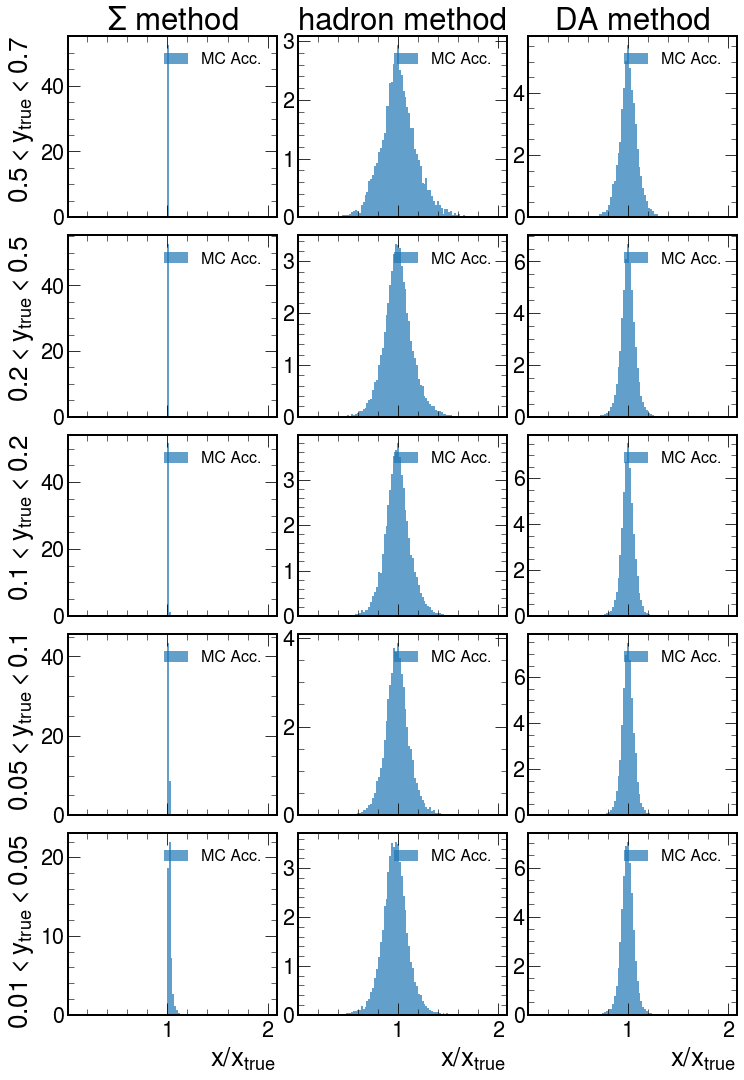

In [8]:
fig,ax = plt.subplots(5,3,figsize=(12,18),sharex=True)
ax = ax.flatten()
ybins = np.array(['gen_y>0.5 and gen_y<0.7', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)

myalpha=0.7
for i in range(5):
    print(ybins[i])
    temp = mc_fastsim.query(ybins[i])
    ax[2 + 3*i].hist(temp['xratio_da__gen_HFS'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='MC Acc.')
    ax[1 + 3*i].hist(temp['xratio_h__gen_HFS'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='MC Acc.')
    ax[0 + 3*i].hist(temp['xratio_sigma__gen_HFS'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='MC Acc.')

plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].set_title('$\Sigma$ method')
ax[1].set_title('hadron method')
ax[2].set_title('DA method')





ax[0].set_ylabel(' $0.5<y_{true}<0.7$')
ax[3].set_ylabel(' $0.2<y_{true}<0.5$')
ax[6].set_ylabel(' $0.1<y_{true}<0.2$')
ax[9].set_ylabel(' $0.05<y_{true}<0.1$')
ax[12].set_ylabel(' $0.01<y_{true}<0.05$')

ax[-1].set_xlabel(r'$x/x_{true}$ ')
ax[-2].set_xlabel(r'$x/x_{true}$ ')
ax[-3].set_xlabel(r'$x/x_{true}$ ')


for i in range(len(ax.flatten())):
    ax[i].legend(loc='best',fontsize=16)    
plt.subplots_adjust(wspace=0.1, hspace=0.1)

if save_plots :
    #plt.savefig('plots/gen-HFS-res.pdf',bbox_inches='tight')
    plt.savefig('plots/gen-HFS-res.png',bbox_inches='tight')

plt.show()


['gen_y>0.5 and gen_y<0.7' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']
gen_y>0.5 and gen_y<0.7
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05
gen_y>0.5 and gen_y<0.7
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05


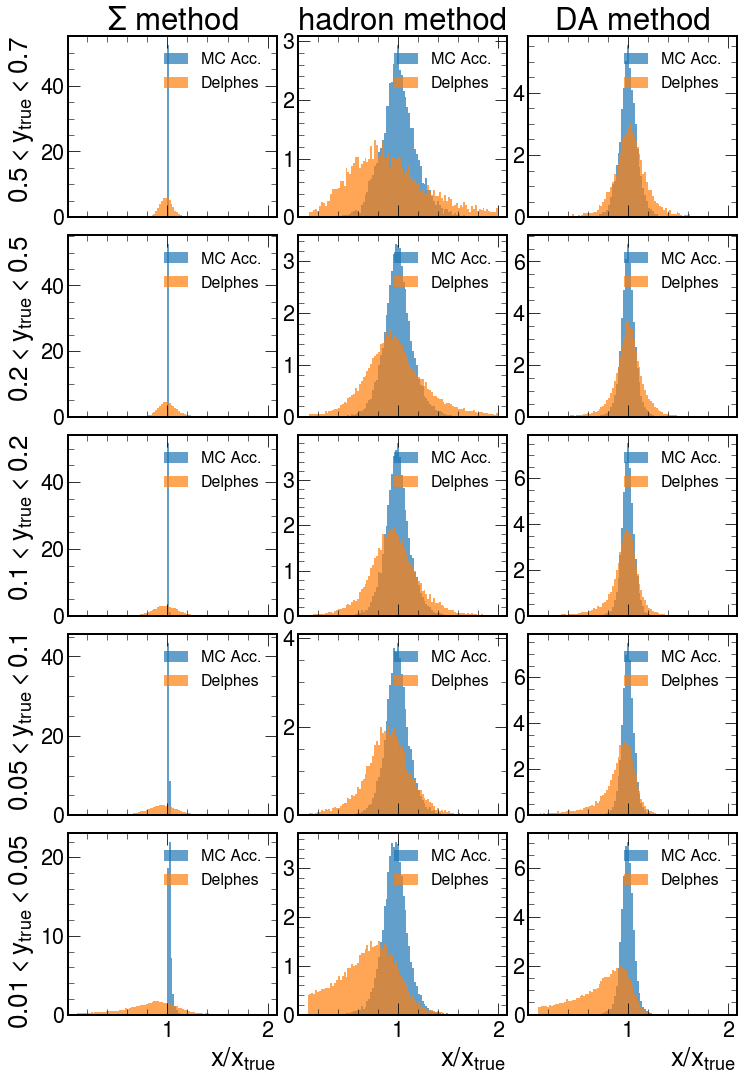

In [9]:
fig,ax = plt.subplots(5,3,figsize=(12,18),sharex=True)
ax = ax.flatten()
ybins = np.array(['gen_y>0.5 and gen_y<0.7', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)

myalpha=0.7
for i in range(5):
    print(ybins[i])
    temp = mc_fastsim.query(ybins[i])
    ax[2 + 3*i].hist(temp['xratio_da__gen_HFS'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='MC Acc.')
    ax[1 + 3*i].hist(temp['xratio_h__gen_HFS'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='MC Acc.')
    ax[0 + 3*i].hist(temp['xratio_sigma__gen_HFS'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='MC Acc.')

for i in range(5):
    print(ybins[i])
    temp = mc_fastsim.query(ybins[i])
    ax[2 + 3*i].hist(temp['xda_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes')
    ax[1 + 3*i].hist(temp['xh_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes')
    ax[0 + 3*i].hist(temp['xsigma_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes')
    
plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].set_title('$\Sigma$ method')
ax[1].set_title('hadron method')
ax[2].set_title('DA method')





ax[0].set_ylabel(' $0.5<y_{true}<0.7$')
ax[3].set_ylabel(' $0.2<y_{true}<0.5$')
ax[6].set_ylabel(' $0.1<y_{true}<0.2$')
ax[9].set_ylabel(' $0.05<y_{true}<0.1$')
ax[12].set_ylabel(' $0.01<y_{true}<0.05$')

ax[-1].set_xlabel(r'$x/x_{true}$ ')
ax[-2].set_xlabel(r'$x/x_{true}$ ')
ax[-3].set_xlabel(r'$x/x_{true}$ ')


for i in range(len(ax.flatten())):
    ax[i].legend(loc='best',fontsize=16)    
plt.subplots_adjust(wspace=0.1, hspace=0.1)

if save_plots :
    #plt.savefig('plots/gen-HFS-res-with-reco.pdf',bbox_inches='tight')
    plt.savefig('plots/gen-HFS-res-with-reco.png',bbox_inches='tight')

plt.show()

In [10]:
mc_fullsim.eval('HFS_pt = sqrt(HFS_px*HFS_px + HFS_py*HFS_py)', inplace=True ) 
mc_fullsim.eval('HFS_Sigma = HFS_E - HFS_pz', inplace=True )
mc_fullsim.eval('HFS_tan_gamma_over_2 = HFS_Sigma / HFS_pt', inplace=True )
mc_fullsim.eval('HFS_gamma = 2 * arctan(HFS_tan_gamma_over_2)', inplace=True )
mc_fullsim.eval('e_e = sqrt(e_px*e_px + e_py*e_py + e_pz*e_pz)', inplace=True )
mc_fullsim.eval('e_empz = e_e - e_pz', inplace=True )

mc_fastsim.eval('HFS_Sigma = HFS_E - HFS_pz', inplace=True )
mc_fastsim.eval('HFS_tan_gamma_over_2 = HFS_Sigma / HFS_pt', inplace=True )
mc_fastsim.eval('HFS_gamma = 2 * arctan(HFS_tan_gamma_over_2)', inplace=True )
mc_fastsim.eval('e_e = sqrt(e_px*e_px + e_py*e_py + e_pz*e_pz)', inplace=True )
mc_fastsim.eval('e_empz = e_e - e_pz', inplace=True )

['gen_y>0.5 and gen_y<0.7' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']
gen_y>0.5 and gen_y<0.7
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05
gen_y>0.5 and gen_y<0.7
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05


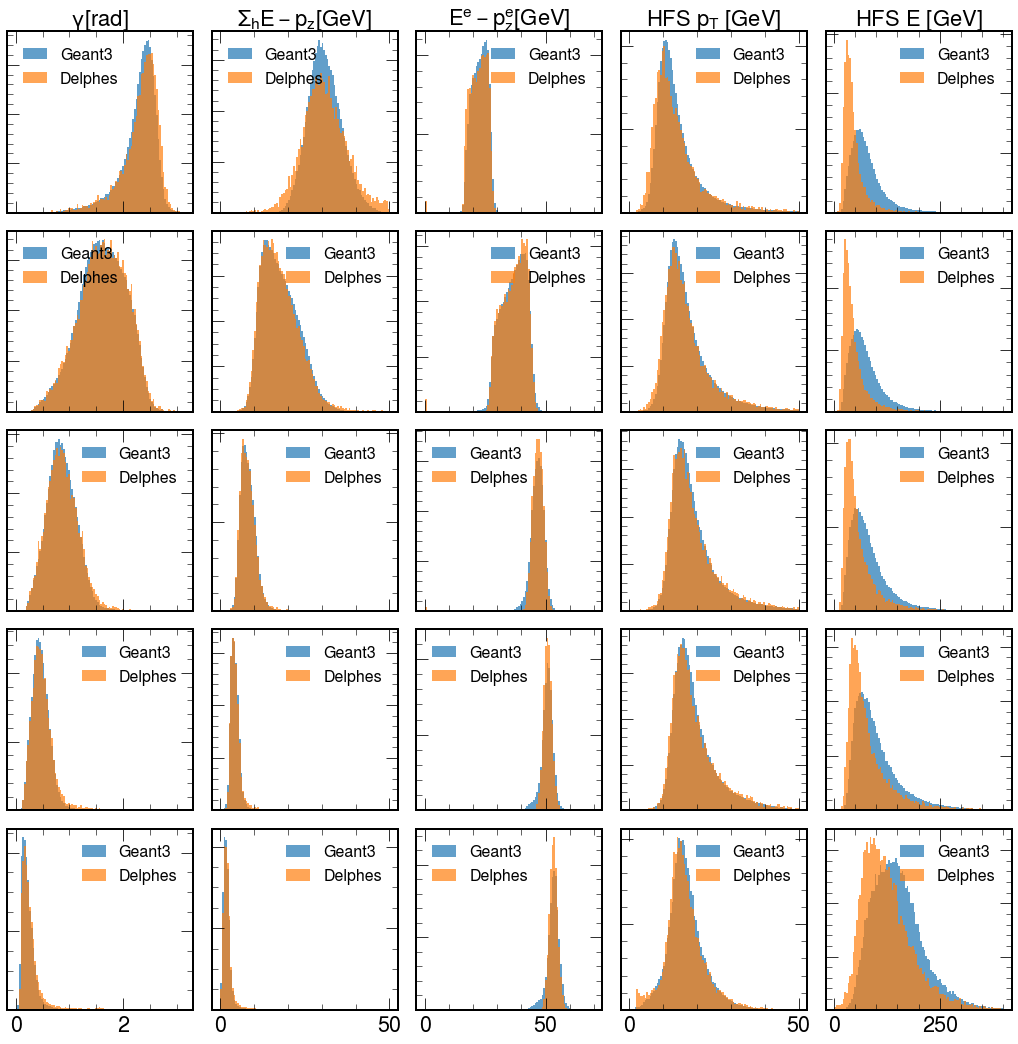

In [11]:

fig,ax = plt.subplots(5,5,figsize=(18,18), sharex='col')

ybins = np.array(['gen_y>0.5 and gen_y<0.7', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)

myalpha=0.7

for i in range(5):
    print(ybins[i])
    temp = mc_fullsim.query(ybins[i])
    ax[i][0].hist(temp['HFS_gamma'],weights=temp['wgt'],density=True,bins=100,range=(0.0,3.14159265),alpha=myalpha,label='Geant3')
    ax[i][1].hist(temp['HFS_Sigma'],weights=temp['wgt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Geant3')
    ax[i][2].hist(temp['e_empz'],weights=temp['wgt'],density=True,bins=100,range=(0,70),alpha=myalpha,label='Geant3')
    ax[i][3].hist(temp['HFS_pt'],weights=temp['wgt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Geant3')
    ax[i][4].hist(temp['HFS_E'],weights=temp['wgt'],density=True,bins=100,range=(0,400),alpha=myalpha,label='Geant3')

for i in range(5):
    print(ybins[i])
    temp = mc_fastsim.query(ybins[i])
    ax[i][0].hist(temp['HFS_gamma'],density=True,bins=100,range=(0.0,3.14159265),alpha=myalpha,label='Delphes')
    ax[i][1].hist(temp['HFS_Sigma'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Delphes')
    ax[i][2].hist(temp['e_empz'],density=True,bins=100,range=(0,70),alpha=myalpha,label='Delphes')
    ax[i][3].hist(temp['HFS_pt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Delphes')
    ax[i][4].hist(temp['HFS_E'],density=True,bins=100,range=(0,400),alpha=myalpha,label='Delphes')
        
    
plt.subplots_adjust(wspace=0.1, hspace=0.1)

#ax[0].set_title('$\Sigma$ method')
#ax[1].set_title('hadron method')
#ax[2].set_title('DA method')
#ax[3].set_title('e method')




#ax[0].set_ylabel(' $0.5<y_{true}<0.7$')
#ax[4].set_ylabel(' $0.2<y_{true}<0.5$')
#ax[8].set_ylabel(' $0.1<y_{true}<0.2$')
#ax[12].set_ylabel(' $0.05<y_{true}<0.1$')
#ax[16].set_ylabel(' $0.01<y_{true}<0.05$')
#ax[-1].set_xlabel(r'$x/x_{true}$ ')

#ax[-2].set_xlabel(r'$x/x_{true}$ ')
#ax[-3].set_xlabel(r'$x/x_{true}$ ')
#ax[-4].set_xlabel(r'$x/x_{true}$ ')

ax = ax.flatten()

ax[0].set_title('$\gamma [rad]$ ', fontsize=22 )
ax[1].set_title('$\Sigma_{h} E-p_{z} [GeV]$', fontsize=22 )
ax[2].set_title('$E^{e}-p^{e}_{z} [GeV]$', fontsize=22 )
ax[3].set_title('HFS $p_{T}$ [GeV]', fontsize=22 )
ax[4].set_title('HFS $E$ [GeV]', fontsize=22 )

for i in range(len(ax.flatten())):
    ax[i].legend(loc='best',fontsize=16)  
    ax[i].set_yticklabels([])
plt.subplots_adjust(wspace=0.1, hspace=0.1)
#plt.xticks(fontsize=2)
#plt.yticks(fontsize=2)

plt.show()

['gen_y>0.5 and gen_y<0.7' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']


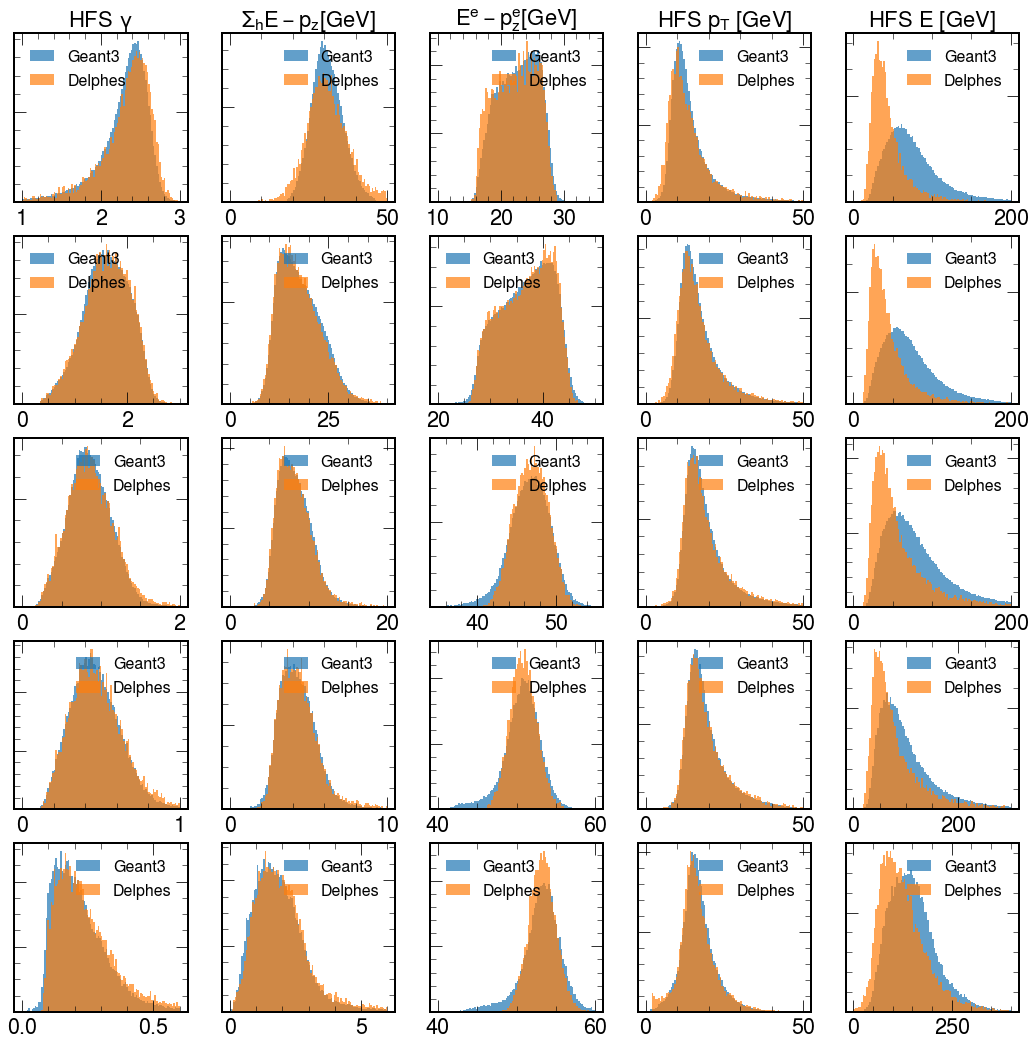

In [14]:
fig,ax = plt.subplots(5,5,figsize=(18,18))

ybins = np.array(['gen_y>0.5 and gen_y<0.7', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)

myalpha=0.7


temp = mc_fullsim.query(ybins[0])
ax[0][0].hist(temp['HFS_gamma'],weights=temp['wgt'],density=True,bins=100,range=(1,3),alpha=myalpha,label='Geant3')
ax[0][1].hist(temp['HFS_Sigma'],weights=temp['wgt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Geant3')
ax[0][2].hist(temp['e_empz'],weights=temp['wgt'],density=True,bins=100,range=(10,35),alpha=myalpha,label='Geant3')
ax[0][3].hist(temp['HFS_pt'],weights=temp['wgt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Geant3')
ax[0][4].hist(temp['HFS_E'],weights=temp['wgt'],density=True,bins=100,range=(0,200),alpha=myalpha,label='Geant3')

temp = mc_fullsim.query(ybins[1])
ax[1][0].hist(temp['HFS_gamma'],weights=temp['wgt'],density=True,bins=100,range=(0,3),alpha=myalpha,label='Geant3')
ax[1][1].hist(temp['HFS_Sigma'],weights=temp['wgt'],density=True,bins=100,range=(0,40),alpha=myalpha,label='Geant3')
ax[1][2].hist(temp['e_empz'],weights=temp['wgt'],density=True,bins=100,range=(20,50),alpha=myalpha,label='Geant3')
ax[1][3].hist(temp['HFS_pt'],weights=temp['wgt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Geant3')
ax[1][4].hist(temp['HFS_E'],weights=temp['wgt'],density=True,bins=100,range=(0,200),alpha=myalpha,label='Geant3')

temp = mc_fullsim.query(ybins[2])
ax[2][0].hist(temp['HFS_gamma'],weights=temp['wgt'],density=True,bins=100,range=(0,2),alpha=myalpha,label='Geant3')
ax[2][1].hist(temp['HFS_Sigma'],weights=temp['wgt'],density=True,bins=100,range=(0,20),alpha=myalpha,label='Geant3')
ax[2][2].hist(temp['e_empz'],weights=temp['wgt'],density=True,bins=100,range=(35,55),alpha=myalpha,label='Geant3')
ax[2][3].hist(temp['HFS_pt'],weights=temp['wgt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Geant3')
ax[2][4].hist(temp['HFS_E'],weights=temp['wgt'],density=True,bins=100,range=(0,200),alpha=myalpha,label='Geant3')

temp = mc_fullsim.query(ybins[3])
ax[3][0].hist(temp['HFS_gamma'],weights=temp['wgt'],density=True,bins=100,range=(0,1),alpha=myalpha,label='Geant3')
ax[3][1].hist(temp['HFS_Sigma'],weights=temp['wgt'],density=True,bins=100,range=(0,10),alpha=myalpha,label='Geant3')
ax[3][2].hist(temp['e_empz'],weights=temp['wgt'],density=True,bins=100,range=(40,60),alpha=myalpha,label='Geant3')
ax[3][3].hist(temp['HFS_pt'],weights=temp['wgt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Geant3')
ax[3][4].hist(temp['HFS_E'],weights=temp['wgt'],density=True,bins=100,range=(0,300),alpha=myalpha,label='Geant3')

temp = mc_fullsim.query(ybins[4])
ax[4][0].hist(temp['HFS_gamma'],weights=temp['wgt'],density=True,bins=100,range=(0,0.6),alpha=myalpha,label='Geant3')
ax[4][1].hist(temp['HFS_Sigma'],weights=temp['wgt'],density=True,bins=100,range=(0,6),alpha=myalpha,label='Geant3')
ax[4][2].hist(temp['e_empz'],weights=temp['wgt'],density=True,bins=100,range=(40,60),alpha=myalpha,label='Geant3')
ax[4][3].hist(temp['HFS_pt'],weights=temp['wgt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Geant3')
ax[4][4].hist(temp['HFS_E'],weights=temp['wgt'],density=True,bins=100,range=(0,400),alpha=myalpha,label='Geant3')






temp = mc_fastsim.query(ybins[0])
ax[0][0].hist(temp['HFS_gamma'],density=True,bins=100,range=(1,3),alpha=myalpha,label='Delphes')
ax[0][1].hist(temp['HFS_Sigma'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Delphes')
ax[0][2].hist(temp['e_empz'],density=True,bins=100,range=(10,35),alpha=myalpha,label='Delphes')
ax[0][3].hist(temp['HFS_pt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Delphes')
ax[0][4].hist(temp['HFS_E'],density=True,bins=100,range=(0,200),alpha=myalpha,label='Delphes')


temp = mc_fastsim.query(ybins[1])
ax[1][0].hist(temp['HFS_gamma'],density=True,bins=100,range=(0,3),alpha=myalpha,label='Delphes')
ax[1][1].hist(temp['HFS_Sigma'],density=True,bins=100,range=(0,40),alpha=myalpha,label='Delphes')
ax[1][2].hist(temp['e_empz'],density=True,bins=100,range=(20,50),alpha=myalpha,label='Delphes')
ax[1][3].hist(temp['HFS_pt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Delphes')
ax[1][4].hist(temp['HFS_E'],density=True,bins=100,range=(0,200),alpha=myalpha,label='Delphes')


temp = mc_fastsim.query(ybins[2])
ax[2][0].hist(temp['HFS_gamma'],density=True,bins=100,range=(0,2),alpha=myalpha,label='Delphes')
ax[2][1].hist(temp['HFS_Sigma'],density=True,bins=100,range=(0,20),alpha=myalpha,label='Delphes')
ax[2][2].hist(temp['e_empz'],density=True,bins=100,range=(35,55),alpha=myalpha,label='Delphes')
ax[2][3].hist(temp['HFS_pt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Delphes')
ax[2][4].hist(temp['HFS_E'],density=True,bins=100,range=(0,200),alpha=myalpha,label='Delphes')


temp = mc_fastsim.query(ybins[3])
ax[3][0].hist(temp['HFS_gamma'],density=True,bins=100,range=(0,1),alpha=myalpha,label='Delphes')
ax[3][1].hist(temp['HFS_Sigma'],density=True,bins=100,range=(0,10),alpha=myalpha,label='Delphes')
ax[3][2].hist(temp['e_empz'],density=True,bins=100,range=(40,60),alpha=myalpha,label='Delphes')
ax[3][3].hist(temp['HFS_pt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Delphes')
ax[3][4].hist(temp['HFS_E'],density=True,bins=100,range=(0,300),alpha=myalpha,label='Delphes')

temp = mc_fastsim.query(ybins[4])
ax[4][0].hist(temp['HFS_gamma'],density=True,bins=100,range=(0,0.6),alpha=myalpha,label='Delphes')
ax[4][1].hist(temp['HFS_Sigma'],density=True,bins=100,range=(0,6),alpha=myalpha,label='Delphes')
ax[4][2].hist(temp['e_empz'],density=True,bins=100,range=(40,60),alpha=myalpha,label='Delphes')
ax[4][3].hist(temp['HFS_pt'],density=True,bins=100,range=(0,50),alpha=myalpha,label='Delphes')
ax[4][4].hist(temp['HFS_E'],density=True,bins=100,range=(0,400),alpha=myalpha,label='Delphes')





        
    
plt.subplots_adjust(wspace=0.2, hspace=0.2)



ax = ax.flatten()

ax[0].set_title('HFS $\gamma$ ', fontsize=22 )
ax[1].set_title('$\Sigma_{h} E-p_{z} [GeV]$', fontsize=22 )
ax[2].set_title('$E^{e}-p^{e}_{z} [GeV]$', fontsize=22 )
ax[3].set_title('HFS $p_{T}$ [GeV]', fontsize=22 )
ax[4].set_title('HFS $E$ [GeV]', fontsize=22 )

for i in range(len(ax.flatten())):
    ax[i].legend(loc='best',fontsize=16)  
    ax[i].set_yticklabels([])
plt.subplots_adjust(wspace=0.2, hspace=0.2)


plt.show()

In [15]:
mc_fullsim.eval('genHFS_pt = sqrt( genHFS_px*genHFS_px + genHFS_py*genHFS_py)', inplace=True )
mc_fullsim.eval('HFSpt_res = HFS_pt/genHFS_pt - 1', inplace=True )

mc_fullsim.eval('e_pt = sqrt(e_px*e_px + e_py*e_py)', inplace=True )
mc_fullsim.eval('gene_pt = sqrt(gene_px*gene_px + gene_py*gene_py)', inplace=True )
mc_fullsim.eval('pt_res = e_pt/gene_pt - 1', inplace=True )
mc_fullsim.eval('gene_p = sqrt(gene_px*gene_px + gene_py*gene_py + gene_pz*gene_pz)', inplace=True )
mc_fullsim.eval('p_res = e_e/gene_p - 1', inplace=True )


mc_fastsim.eval('genHFS_pt = gen_HFS_pt', inplace=True )
mc_fastsim.eval('HFSpt_res = HFS_pt/gen_HFS_pt - 1', inplace=True )

mc_fastsim.eval('e_pt = sqrt(e_px*e_px + e_py*e_py)', inplace=True )
mc_fastsim.eval('pt_res = e_pt / gen_e_pt - 1', inplace=True )
mc_fastsim.eval('p_res = e_e / gen_e_e - 1', inplace=True )
mc_fastsim.eval('gene_p = gen_e_e', inplace=True )

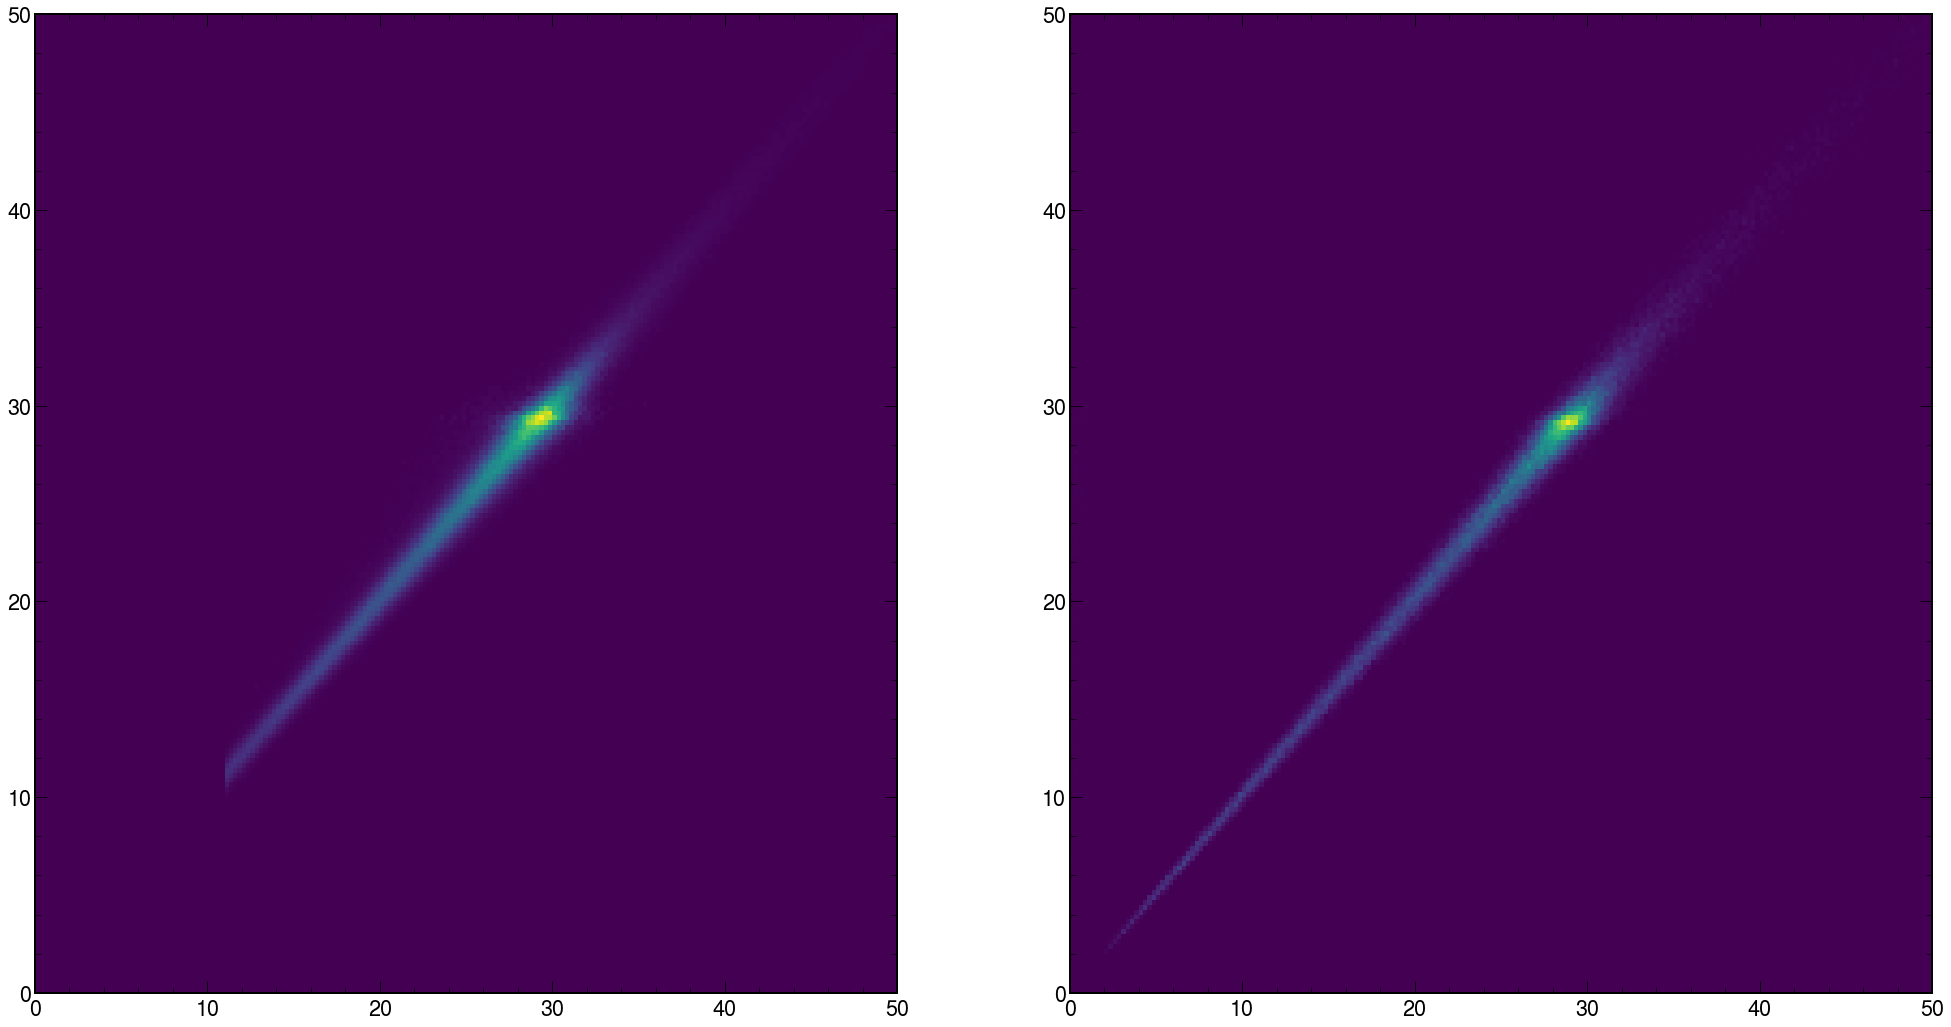

In [16]:
fig,ax = plt.subplots(1,2,figsize=(34,18))

ax[0].hist2d(mc_fullsim['e_e'],mc_fullsim['gene_p'],weights=mc_fullsim['wgt'],range=([0,50],[0,50]),bins=200)
ax[1].hist2d(mc_fastsim['e_e'],mc_fastsim['gene_p'],range=([0,50],[0,50]),bins=200)

plt.show()

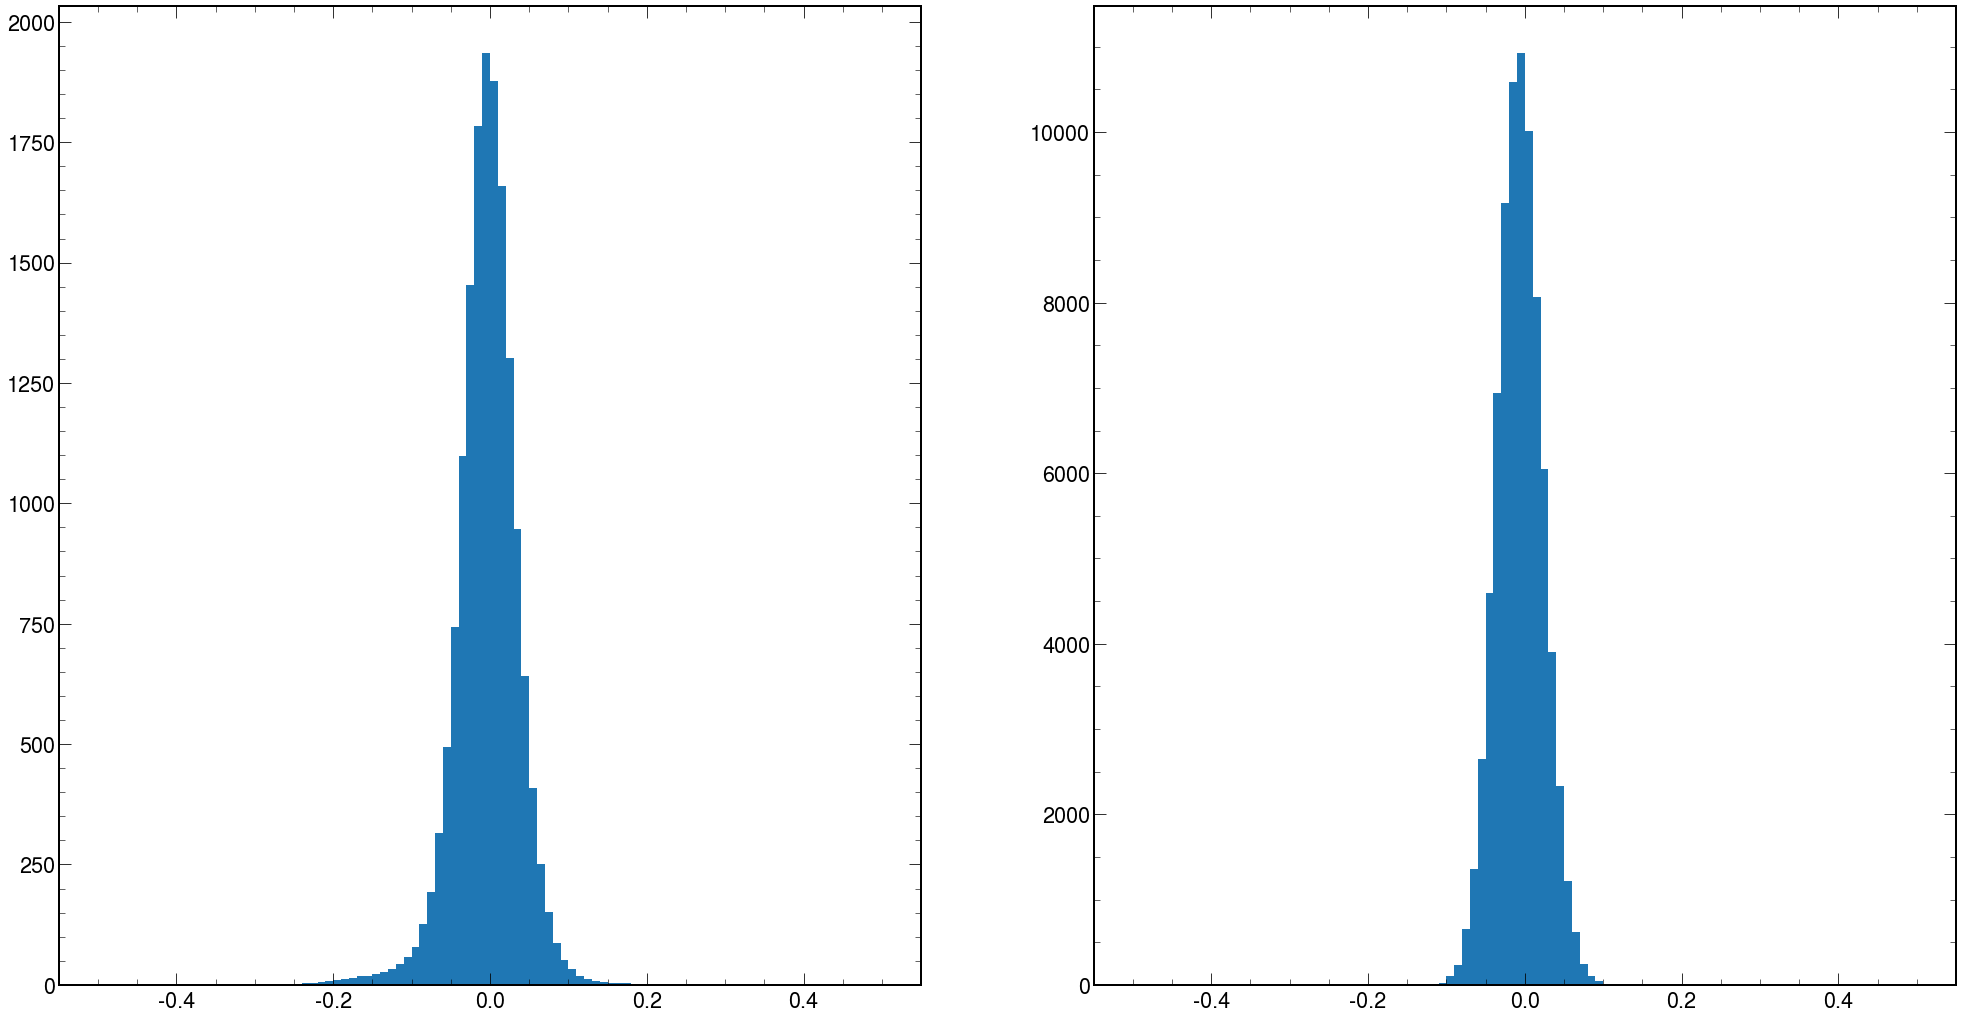

In [17]:
fig,ax = plt.subplots(1,2,figsize=(34,18))

ax[0].hist(mc_fullsim['p_res'],weights=mc_fullsim['wgt'],range=([-0.5,0.5]),bins=100)
ax[1].hist(mc_fastsim['p_res'],range=([-0.5,0.5]),bins=100)

plt.show()

['gen_y>0.5 and gen_y<0.7' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']
gen_y>0.5 and gen_y<0.7
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05
gen_y>0.5 and gen_y<0.7
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05


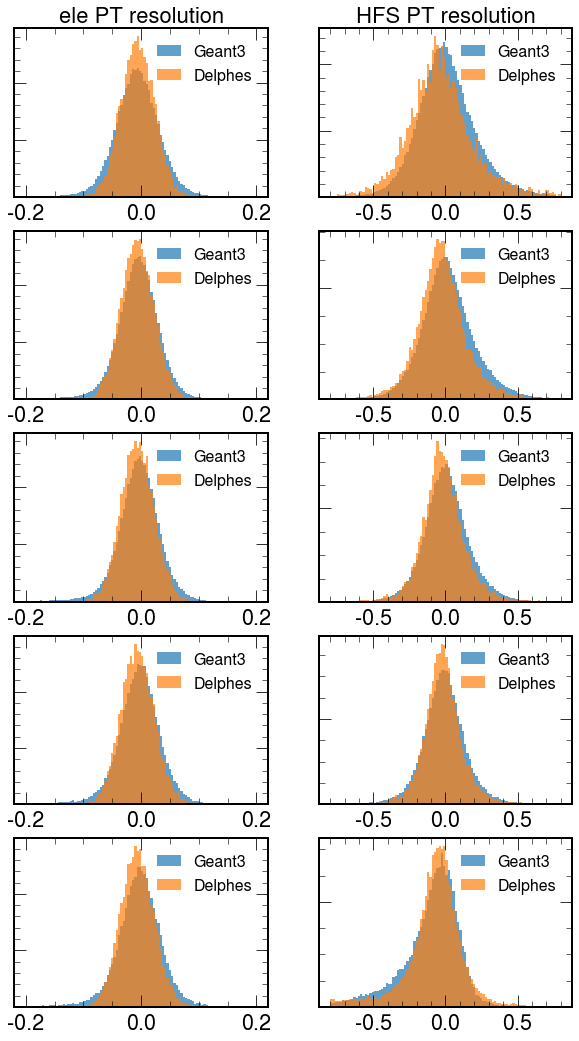

In [18]:
fig,ax = plt.subplots(5,2,figsize=(10,18))

ybins = np.array(['gen_y>0.5 and gen_y<0.7', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)

myalpha=0.7

for i in range(5):
    print(ybins[i])
    temp = mc_fullsim.query(ybins[i])
    ax[i][0].hist(temp['pt_res'],weights=temp['wgt'],density=True,bins=100,range=(-0.2,0.2),alpha=myalpha,label='Geant3')
    ax[i][1].hist(temp['HFSpt_res'],weights=temp['wgt'],density=True,bins=100,range=(-0.8,0.8),alpha=myalpha,label='Geant3')
    
for i in range(5):
    print(ybins[i])
    temp = mc_fastsim.query(ybins[i])
    ax[i][0].hist(temp['pt_res'],density=True,bins=100,range=(-0.2,0.2),alpha=myalpha,label='Delphes')
    ax[i][1].hist(temp['HFSpt_res'],density=True,bins=100,range=(-0.8,0.8),alpha=myalpha,label='Delphes')

ax = ax.flatten()

ax[0].set_title('ele PT resolution', fontsize=22)
ax[1].set_title('HFS PT resolution', fontsize=22)

for i in range(len(ax.flatten())):
    ax[i].legend(loc='best',fontsize=16)
    ax[i].set_yticklabels([])
    
plt.show()

[11.2675, 14.123000000000001, 17.702, 22.189, 27.813, 34.862, 43.698, 54.7735, 68.656, 86.057, 107.868]
[11.2675, 14.123000000000001, 17.702, 22.189, 27.813, 34.862, 43.698, 54.7735, 68.656, 86.057, 107.868]
[11.2675, 14.123000000000001, 17.702, 22.189, 27.813, 34.862, 43.698, 54.7735, 68.656, 86.057, 107.868]


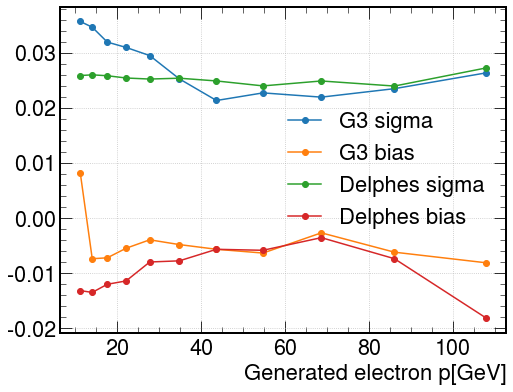

<Figure size 720x720 with 0 Axes>

In [19]:
from scipy import stats

fig = plt.figure( figsize=(8, 6))
temp = mc_fullsim.query('gen_Q2>0').groupby(pd.cut(mc_fullsim.query('gen_Q2>0')['gene_p'], bins=np.geomspace(10,120,12)))['p_res']
trim_mean = temp.apply(stats.trim_mean, 0.025)
trim_std = temp.apply(stats.mstats.trimmed_std, limits=(0.025,0.025))
temp = temp.agg(['mean', 'std', 'size']).reset_index()


x = [i.mid for i in temp['gene_p']]
print (x)

plt.plot(x, trim_std,'o-',label='G3 sigma')
#plt.plot(x, temp['std'],'o-',label='JER (trimmed)')
plt.plot(x, temp['mean'],'o-',label='G3 bias')



####
temp = mc_fastsim.query('gen_Q2>0').groupby(pd.cut(mc_fastsim.query('gen_Q2>0')['gene_p'], bins=np.geomspace(10,120,12)))['p_res']
trim_mean = temp.apply(stats.trim_mean, 0.025)
trim_std = temp.apply(stats.mstats.trimmed_std, limits=(0.025,0.025))
temp = temp.agg(['mean', 'std', 'size']).reset_index()


x = [i.mid for i in temp['gene_p']]
print (x)

plt.plot(x, trim_std,'o-',label='Delphes sigma')
#plt.plot(x, temp['std'],'o-',label='JER (trimmed)')
plt.plot(x, temp['mean'],'o-',label='Delphes bias')



x = [i.mid for i in temp['gene_p']]
print (x)

#plt.plot(x, trim_std,'o-',label='Delphes 2 sigma')
#plt.plot(x, temp['std'],'o-',label='JER (trimmed)')
#plt.plot(x, temp['mean'],'o-',label='Delphes 2 bias')


plt.xlabel('Generated electron p[GeV]',fontsize=22)
plt.legend(fontsize=22)
plt.grid()
#plt.ylim([-0.4,0.5])
plt.show()
plt.tight_layout()

[11.2675, 14.123000000000001, 17.702, 22.189, 27.813, 34.862, 43.698, 54.7735, 68.656, 86.057, 107.868]
[11.2675, 14.123000000000001, 17.702, 22.189, 27.813, 34.862, 43.698, 54.7735, 68.656, 86.057, 107.868]


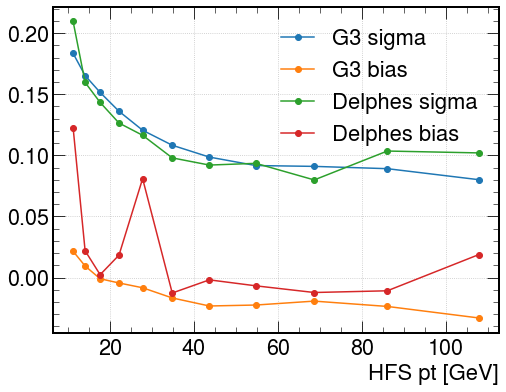

<Figure size 720x720 with 0 Axes>

In [20]:
fig = plt.figure( figsize=(8, 6))
temp = mc_fullsim.query('gen_Q2>0').groupby(pd.cut(mc_fullsim.query('gen_Q2>0')['genHFS_pt'], bins=np.geomspace(10,120,12)))['HFSpt_res']
trim_mean = temp.apply(stats.trim_mean, 0.025)
trim_std = temp.apply(stats.mstats.trimmed_std, limits=(0.025,0.025))
temp = temp.agg(['mean', 'std', 'size']).reset_index()


x = [i.mid for i in temp['genHFS_pt']]
print (x)

plt.plot(x, trim_std,'o-',label='G3 sigma')
#plt.plot(x, temp['std'],'o-',label='JER (trimmed)')
plt.plot(x, temp['mean'],'o-',label='G3 bias')



####
temp = mc_fastsim.query('gen_Q2>0').groupby(pd.cut(mc_fastsim.query('gen_Q2>0')['genHFS_pt'], bins=np.geomspace(10,120,12)))['HFSpt_res']
trim_mean = temp.apply(stats.trim_mean, 0.025)
trim_std = temp.apply(stats.mstats.trimmed_std, limits=(0.025,0.025))
temp = temp.agg(['mean', 'std', 'size']).reset_index()


x = [i.mid for i in temp['genHFS_pt']]
print (x)

plt.plot(x, trim_std,'o-',label='Delphes sigma')
#plt.plot(x, temp['std'],'o-',label='JER (trimmed)')
plt.plot(x, temp['mean'],'o-',label='Delphes bias')





#x = [i.mid for i in temp['genHFS_pt']]
#print (x)

#plt.plot(x, trim_std,'o-',label='Delphes sigma')
##plt.plot(x, temp['std'],'o-',label='JER (trimmed)')
#plt.plot(x, temp['mean'],'o-',label='Delphes bias')



plt.xlabel('HFS pt [GeV]',fontsize=22)
plt.legend(fontsize=22)
plt.grid()
#plt.ylim([-0.4,0.5])
plt.show()
plt.tight_layout()

In [21]:
mc_fullsim.eval('e_phi = arctan2( e_py, e_px )', inplace = True )
mc_fastsim.eval('e_phi = arctan2( e_py, e_px )', inplace = True )

['gen_y>0.5 and gen_y<0.7' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']
gen_y>0.5 and gen_y<0.7
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05
gen_y>0.5 and gen_y<0.7
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05


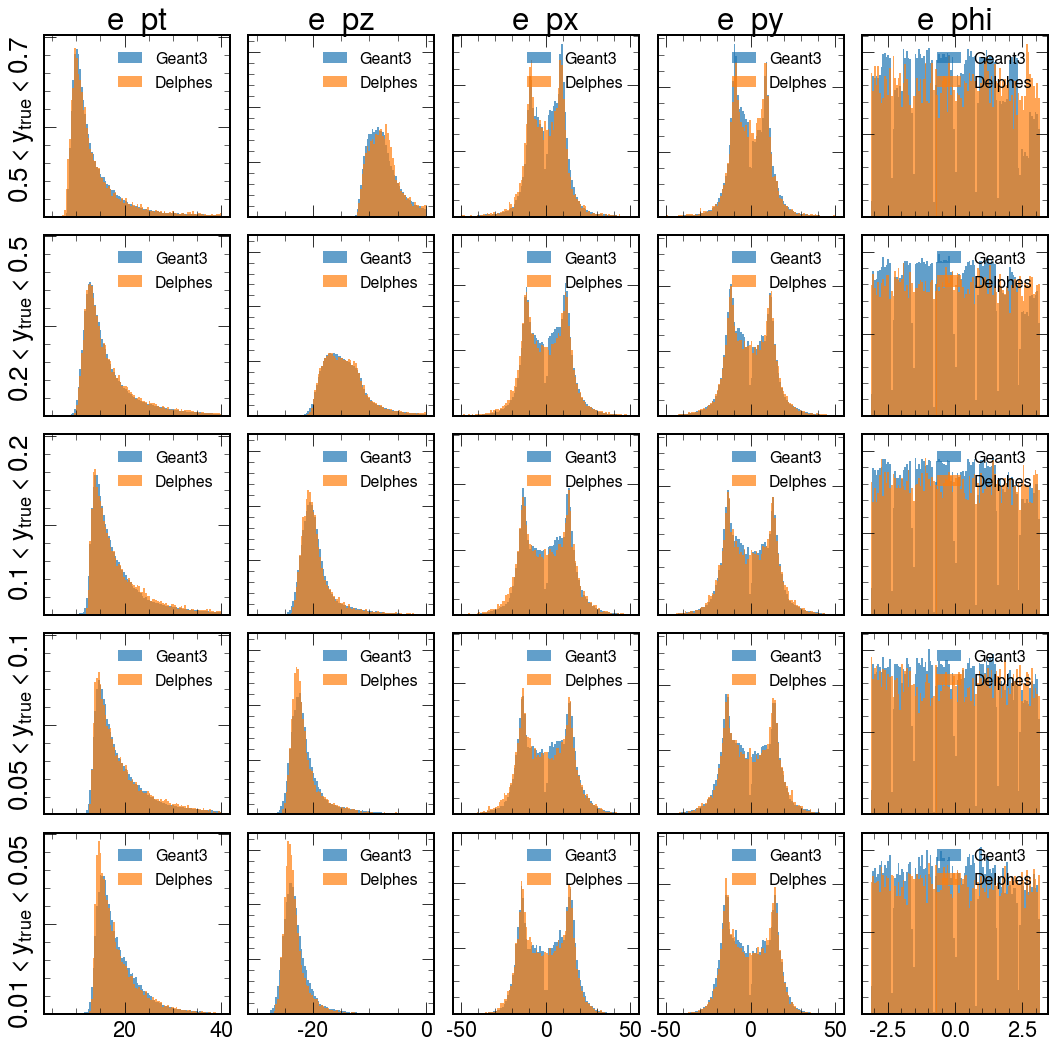

In [22]:
fig,ax = plt.subplots(5,5,figsize=(18,18),sharey='col',sharex='col')
ax = ax.flatten()
ybins = np.array(['gen_y>0.5 and gen_y<0.7', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)

myalpha=0.7

for i in range(5):
    print(ybins[i])
    temp = mc_fullsim.query(ybins[i])
    ax[4 + 5*i].hist(temp['e_phi'],weights=temp['wgt'],density=True,bins=100,range=(-3.14159,3.14159),alpha=myalpha,label='Geant3')
    ax[3 + 5*i].hist(temp['e_py'],weights=temp['wgt'],density=True,bins=100,range=(-50,50),alpha=myalpha,label='Geant3')
    ax[2 + 5*i].hist(temp['e_px'],weights=temp['wgt'],density=True,bins=100,range=(-50,50),alpha=myalpha,label='Geant3')
    ax[1 + 5*i].hist(temp['e_pz'],weights=temp['wgt'],density=True,bins=100,range=(-30,0),alpha=myalpha,label='Geant3')
    ax[0 + 5*i].hist(temp['e_pt'],weights=temp['wgt'],density=True,bins=100,range=(5,40),alpha=myalpha,label='Geant3')



for i in range(5):
    print(ybins[i])
    temp = mc_fastsim.query(ybins[i])
    ax[4 + 5*i].hist(temp['e_phi'],density=True,bins=100,range=(-3.14159,3.14159),alpha=myalpha,label='Delphes')
    ax[3 + 5*i].hist(temp['e_py'],density=True,bins=100,range=(-50,50),alpha=myalpha,label='Delphes')
    ax[2 + 5*i].hist(temp['e_px'],density=True,bins=100,range=(-50,50),alpha=myalpha,label='Delphes')
    ax[1 + 5*i].hist(temp['e_pz'],density=True,bins=100,range=(-30,0),alpha=myalpha,label='Delphes')
    ax[0 + 5*i].hist(temp['e_pt'],density=True,bins=100,range=(5,40),alpha=myalpha,label='Delphes')


for i in range(len(ax.flatten())):
    ax[i].legend(loc='best')    
plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].set_title('e_pt')
ax[1].set_title('e_pz')
ax[2].set_title('e_px')
ax[3].set_title('e_py')
ax[4].set_title('e_phi')

#ax[2].set_title('hadron method')
#ax[3].set_title('$\Sigma$ method')


ax[0].set_ylabel(' $0.5<y_{true}<0.7$')
ax[5].set_ylabel(' $0.2<y_{true}<0.5$')
ax[10].set_ylabel(' $0.1<y_{true}<0.2$')
ax[15].set_ylabel(' $0.05<y_{true}<0.1$')
ax[20].set_ylabel(' $0.01<y_{true}<0.05$')
#ax[-1].set_xlabel(r'$x/x_{true}$ ')

#ax[-2].set_xlabel(r'$x/x_{true}$ ')
#ax[-3].set_xlabel(r'$x/x_{true}$ ')
#ax[-4].set_xlabel(r'$x/x_{true}$ ')

#ax[2].text(0.75, 0.5,r"Comparigon of $\bf{H1}$"+' full simulation (Django+G3) and fast-sim (Delphes)',
#                 horizontalalignment='center',multialignment='center',
#           verticalalignment='center', fontsize=30)

for i in range(len(ax.flatten())):
    ax[i].legend(loc='best',fontsize=16)  
    ax[i].set_yticklabels([])
plt.subplots_adjust(wspace=0.1, hspace=0.1)
#plt.xticks(fontsize=2)
#plt.yticks(fontsize=2)

plt.show()


